<a href="https://colab.research.google.com/github/AttilaAlbayrak/Descriptive-Stat-GUI/blob/main/Copy_of_Humana_Competition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Packages

In [ ]:
import pandas as pd
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy import stats

In [ ]:
#data importing 

data_Set = pd.read_excel('/content/Positive Training .xlsx')


holdoutfile_xvals = pd.read_excel('/content/Holdout.Extract (1).xlsx') #holdout file

x_idremove = holdoutfile_xvals.drop(labels='id',axis=1) #holdoutfile 
x_idremove.info


# Data Pre-processing

Building a class for data pre-processing

In [ ]:
# building a class for data processing 

class data_cleaning():
  def __init__(self,datafile):
    self.datafile = datafile

  def missingvals(self): #finding missing values and replacing it with the approiate stat for our model
       self.datafile = (self.datafile.fillna(self.datafile.median()))
       return self.datafile

  def dummy_code(self): #finding qual vars and coding dummay vars 
       dummy = pd.get_dummies(self.datafile,drop_first=False)
       self.datafile = (self.datafile.fillna(self.datafile.mode()))
       return dummy


  

In [ ]:
#applying our class to the dataset
clean_data = data_cleaning(data_Set) #for training data 
clean_data2 = clean_data.missingvals()
clean_data3 = clean_data.dummy_code()
clean_data3

#Correlation Matrix for Numeric data

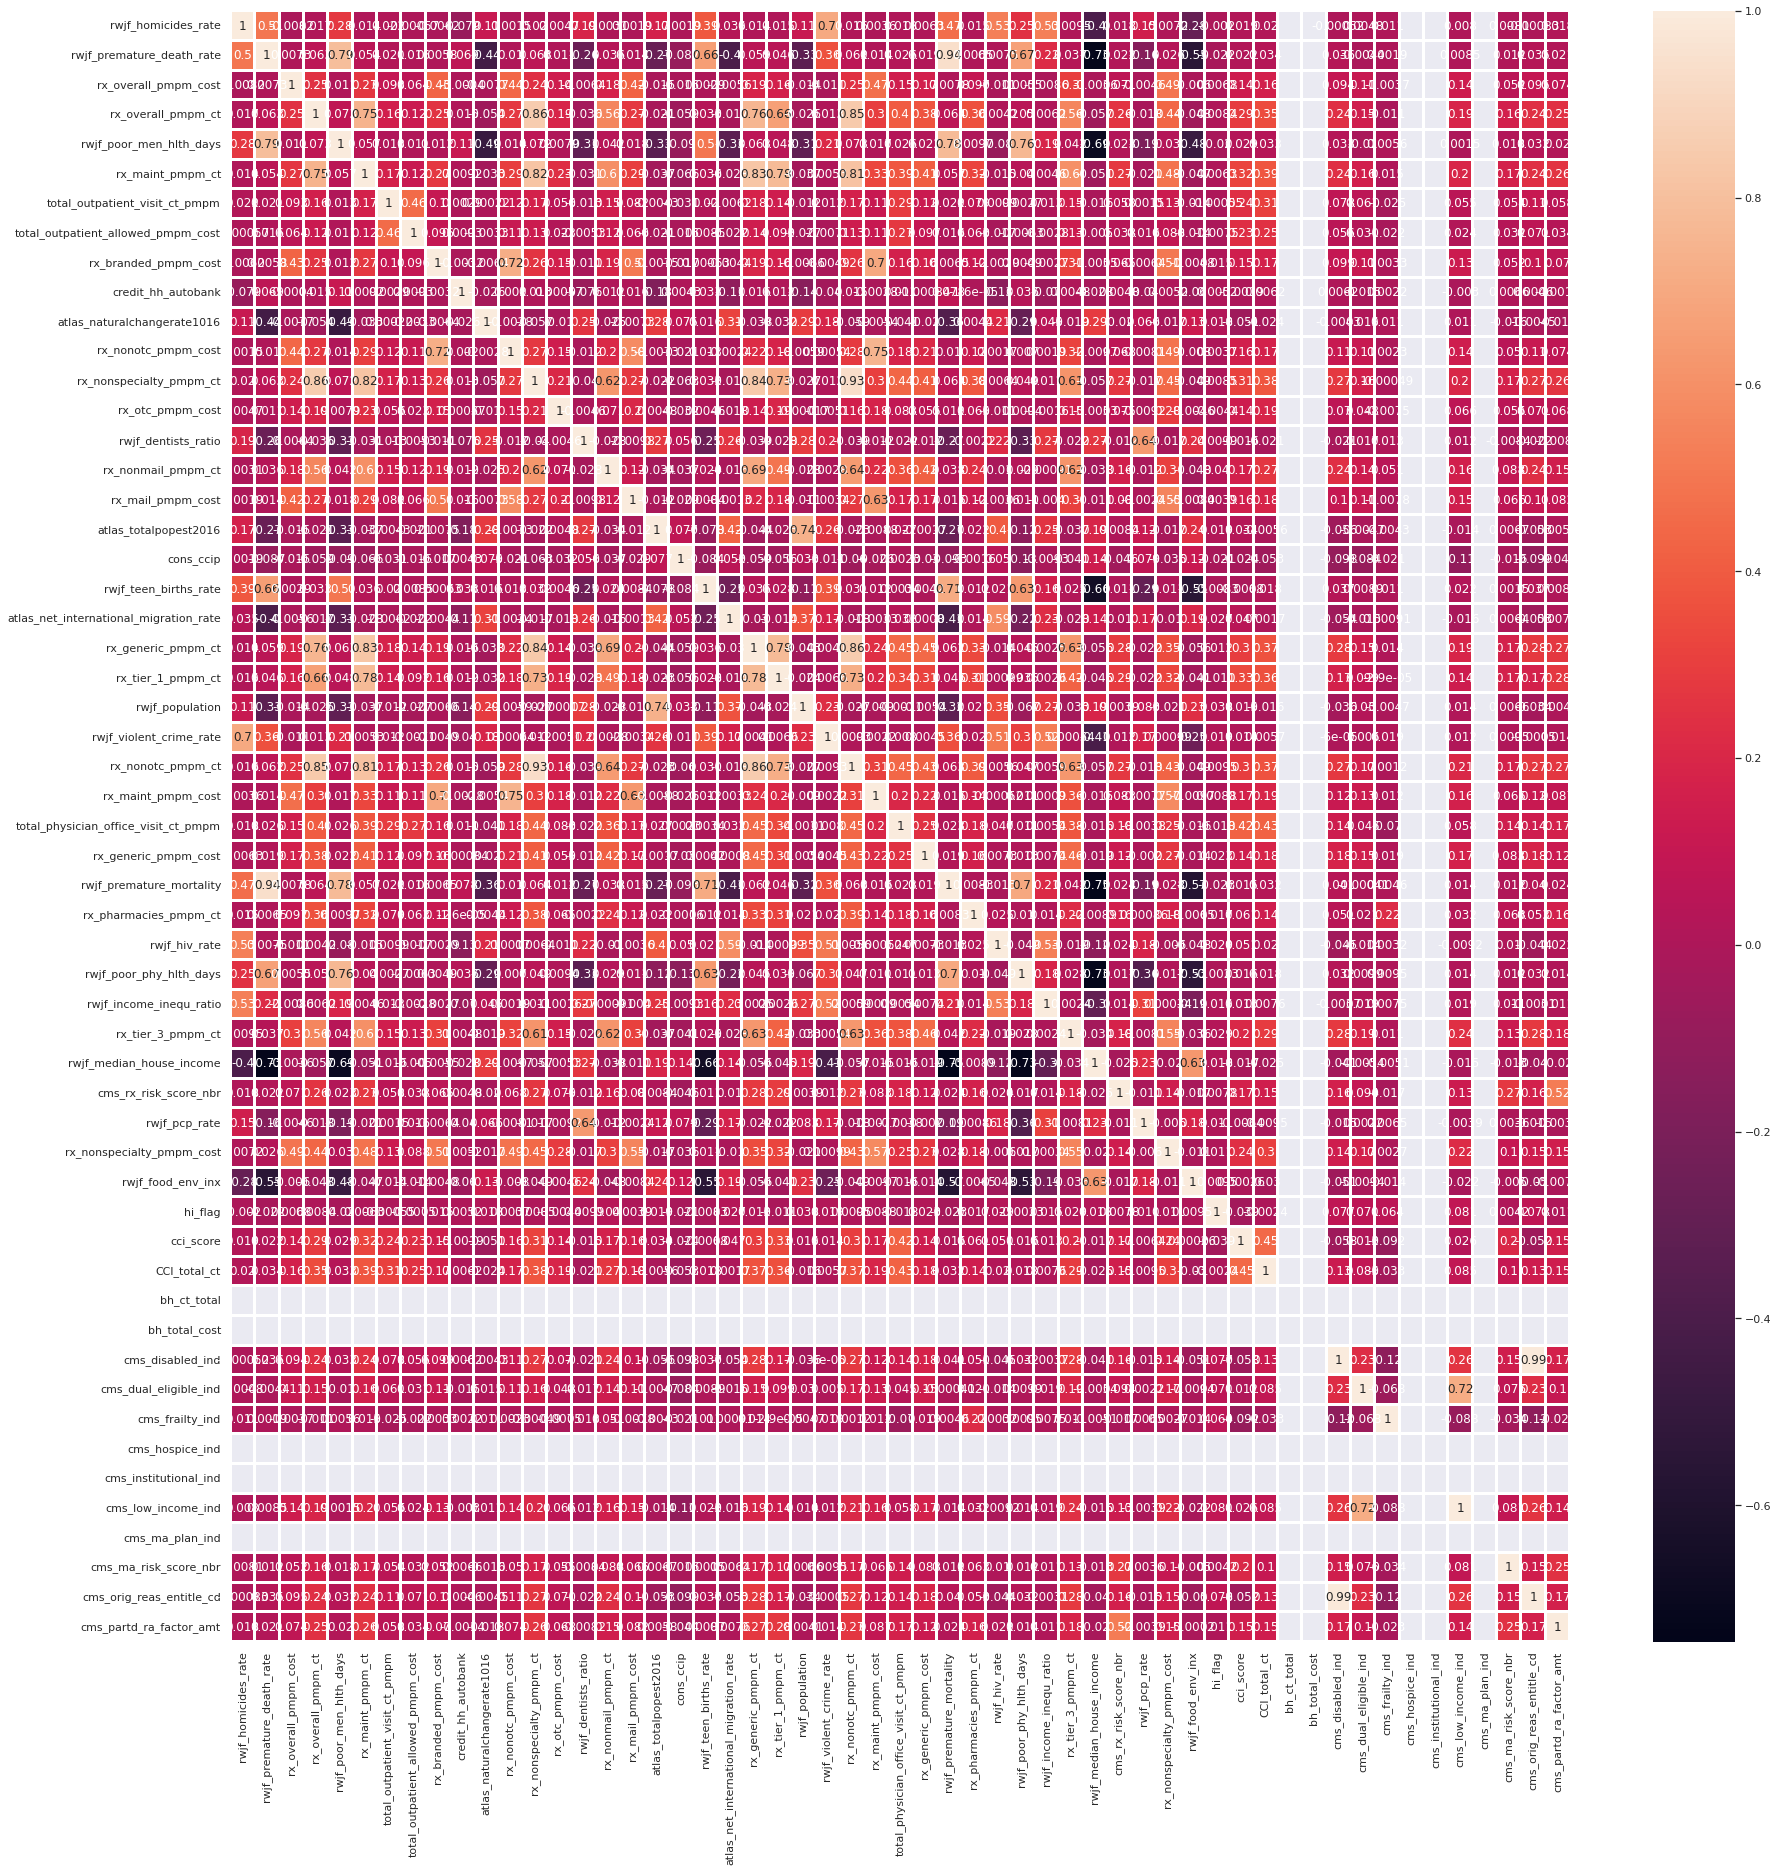

In [ ]:
index = clean_data3.iloc[:,0:70]

mat=index.corr()
sns.set(rc = {'figure.figsize':(30,30)})
sns.heatmap(mat, annot=True,linewidths=2)
plt.show()

#clean_data3.iloc[:,0:10]

# Training the Log Model 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = clean_data3.drop(columns=['Target var'])


y = clean_data3['Target Var']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



#using weights for unbalanced target var and building our trained model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

x, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=42)


#x,y split and model building
x = clean_data3[['Number of signifigant variables']]


y = clean_data3['Target var']


y 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(X_train.shape,y_train.shape)


train_model = LogisticRegression(class_weight='balanced')

train_model.fit(X_train,y_train)

y_pred=train_model.predict(X_train)

conf_matrix=confusion_matrix(y_train,train_model.predict(X_train))

(33810, 11) (33810,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.6600709849157054

In [1]:
#Area under the ROC curve statistic for training
from sklearn import metrics
metrics.roc_auc_score(y_train, y_pred)

NameError: ignored

In [ ]:
# confusion matrix
conf_matrix_1=confusion_matrix(y_test,train_model.predict(X_train))

print(conf_matrix_1)


from sklearn.metrics import confusion_matrix
confusion_train =confusion_matrix(y_train,y_pred)

ax= plt.subplot()
sns.heatmap(confusion_train, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['True_Negative', 'True_Positive']); ax.yaxis.set_ticklabels(['False_Negative', 'False Positive']);

In [ ]:
#Regression Ouput for training
import statsmodels.api as sm
def get_log_Results():
  x_featTrain = X_train
  results = sm.Logit(y_train,X_train).fit()
  print(results.summary())
output = get_log_Results()
output


#Testing the Log model with new data 

In [ ]:
y_prediction = train_model.predict(X_test) # testing model

#test the model for accuracy and AUC score

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.7000690131124914

In [ ]:
from sklearn import metrics
metrics.roc_auc_score(y_test, y_prediction)

0.6655639493832373

# Confusion Matrix for modeling test accuracy

In [ ]:
from sklearn.metrics import confusion_matrix
x = confusion_matrix(y_test,y_prediction)


ax= plt.subplot()
sns.heatmap(x, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['True_Negative', 'True_Positive']); ax.yaxis.set_ticklabels(['False_Negative', 'False_Positive']);


NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
train = classification_report(y_test, train_model.predict(X_test))
print(train)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     13864
           1       0.00      0.00      0.00       626

    accuracy                           0.96     14490
   macro avg       0.48      0.50      0.49     14490
weighted avg       0.92      0.96      0.94     14490



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test = classification_report(y_train, train_model.predict(X_train))

print(test)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     32318
           1       0.00      0.00      0.00      1492

    accuracy                           0.96     33810
   macro avg       0.48      0.50      0.49     33810
weighted avg       0.91      0.96      0.93     33810



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#stepwise log model for var selection

In [ ]:
import statsmodels.api as sm

def backward_regression(X, y,
                           initial_list=[], 
                           threshold_in=0.01, 
                           threshold_out = 0.05, 
                           verbose=True):
    included=list(X.columns)
    while True:
        changed=False
        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop with p-value '.format(worst_feature, worst_pval))
        if not changed:
            break
    return included
def get_log_Results():
  x_featTrain = x
  results = sm.Logit(y_train,X_train).fit()
  print(results.summary())

output = get_log_Results()
output
train_forward_step = backward_regression(X_train,y_train)
train_forward_step

Optimization terminated successfully.
         Current function value: 0.574342
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                hi_flag   No. Observations:                33810
Model:                          Logit   Df Residuals:                    33809
Method:                           MLE   Df Model:                            0
Date:                Thu, 13 Oct 2022   Pseudo R-squ.:                  -2.176
Time:                        19:54:29   Log-Likelihood:                -19419.
converged:                       True   LL-Null:                       -6114.6
Covariance Type:            nonrobust   LLR p-value:                       nan
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
cms_disabled_ind    -2.5817      0.041    -63.169      0.000      -2.662      -2.502
Optimizatio

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


['cms_disabled_ind']